In [26]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer,WordNetLemmatizer
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
messages = pd.read_csv("spam.csv", encoding='latin-1')

In [28]:
messages.shape
messages.drop(labels = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='v1', ylabel='count'>

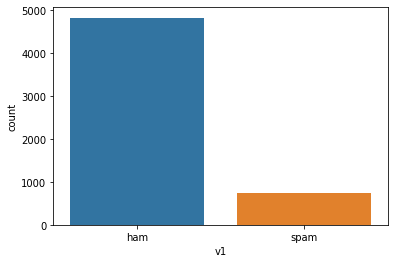

In [29]:
encoder = LabelEncoder()
messages['target'] = encoder.fit_transform (messages['v1'])
sns.countplot(x=messages.v1)

In [30]:
# Creating a function to report confusion metrics

def confusion_metrics (conf_matrix,y_test,y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    print("Classification accuracy = ", accuracy_score(y_test,y_pred)*100)
    print("Precision               = ", precision_score(y_test,y_pred)*100)
    print("Recall                  = ", recall_score(y_test,y_pred)*100)
    print("F1-score                = ", f1_score(y_test,y_pred)*100)
    print("Neagtive recall         = ", (conf_matrix[0][0] / float(conf_matrix[0][0] + conf_matrix[0][1]))*100)
    
    

In [31]:
ps = PorterStemmer()
ss = SnowballStemmer(language='english')
ls = LancasterStemmer()
lem = WordNetLemmatizer()
corpus1 = []
corpus2 = []
corpus3 = []
corpus4 = []

for i in range(0,len(messages)):
    data_clean = re.sub('[^a-zA-Z]', ' ', messages['v2'][i])
    data_clean = data_clean.lower()
    data_clean = data_clean.split()
    
    data_stem_ps = [ps.stem(word) for word in data_clean if not word in stopwords.words('english')]
    data_stem_ss = [ss.stem(word) for word in data_clean if not word in stopwords.words('english')]
    data_stem_ls = [ls.stem(word) for word in data_clean if not word in stopwords.words('english')]
    
    data_lem = [lem.lemmatize(word) for word in data_clean if not word in stopwords.words('english')]
    data_lem = ' '.join(data_lem)
    
    data_lem_ps = [lem.lemmatize(word) for word in data_stem_ps if not word in stopwords.words('english')]
    data_lem_ps = ' '.join(data_lem_ps)
    data_lem_ss = [lem.lemmatize(word) for word in data_stem_ss if not word in stopwords.words('english')]
    data_lem_ss = ' '.join(data_lem_ss)
    
    data_lem_ls = [lem.lemmatize(word) for word in data_stem_ls if not word in stopwords.words('english')]
    data_lem_ls = ' '.join(data_lem_ls)
    
    corpus1.append(data_lem_ps)
    corpus2.append(data_lem_ss)
    corpus3.append(data_lem_ls)
    corpus4.append(data_lem)

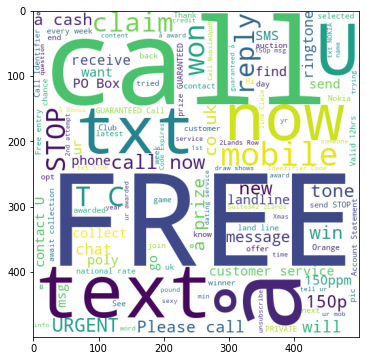

In [32]:
wc = WordCloud (width = 500, height = 500, min_font_size=10, background_color= 'white')
spam_wc = wc.generate (messages [messages['v1'] == 'spam']['v2'].str.cat(sep=" "))
plt.figure (figsize = (20,6))
plt.imshow (spam_wc)

In [33]:
# Creating the TF-IDF model
def tfidf_model(corpus1,corpus2,corpus3,corpus4):
    cv = TfidfVectorizer(max_features=5000)
    X1 = cv.fit_transform(corpus1).toarray()
    X2 = cv.fit_transform(corpus2).toarray()
    X3 = cv.fit_transform(corpus3).toarray()
    X4 = cv.fit_transform(corpus4).toarray()
    Y = pd.get_dummies(messages['v1'])
    Y=Y.iloc[:,1].values
    return X1,X2,X3,X4,Y

In [34]:
# Creating the Bag of Words model
def bag_of_words_model(corpus1,corpus2,corpus3,corpus4):
        cv = CountVectorizer(max_features=5000)
        X1 = cv.fit_transform(corpus1).toarray()
        X2 = cv.fit_transform(corpus2).toarray()
        X3 = cv.fit_transform(corpus3).toarray()
        X4 = cv.fit_transform(corpus4).toarray()
        Y = pd.get_dummies(messages['v1'])
        Y=Y.iloc[:,1].values
        return X1,X2,X3,X4,Y

In [35]:
# Train Test Split for TF-IDF

from sklearn.model_selection import train_test_split
X1tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[0]
X2tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[1]
X3tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[2]
X4tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[3]
Ytf  = tfidf_model(corpus1,corpus2,corpus3,corpus4)[4]
X1tf_train, X1tf_test, Y1tf_train, Y1tf_test = train_test_split(X1tf, Ytf, test_size = 0.30, random_state = 0)
X2tf_train, X2tf_test, Y2tf_train, Y2tf_test = train_test_split(X2tf, Ytf, test_size = 0.30, random_state = 0)
X3tf_train, X3tf_test, Y3tf_train, Y3tf_test = train_test_split(X3tf, Ytf, test_size = 0.30, random_state = 0)
X4tf_train, X4tf_test, Y4tf_train, Y4tf_test = train_test_split(X4tf, Ytf, test_size = 0.30, random_state = 0)

In [36]:
# Train Test Split for Bag-of-words

from sklearn.model_selection import train_test_split
X1bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[0]
X2bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[1]
X3bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[2]
X4bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[3]
Ybow  = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[4]
X1bow_train, X1bow_test, Y1bow_train, Y1bow_test = train_test_split(X1bow, Ybow, test_size = 0.30, random_state = 0)
X2bow_train, X2bow_test, Y2bow_train, Y2bow_test = train_test_split(X2bow, Ybow, test_size = 0.30, random_state = 0)
X3bow_train, X3bow_test, Y3bow_train, Y3bow_test = train_test_split(X3bow, Ybow, test_size = 0.30, random_state = 0)
X4bow_train, X4bow_test, Y4bow_train, Y4bow_test = train_test_split(X4bow, Ybow, test_size = 0.30, random_state = 0)

In [37]:
X1tf_test.shape

(1672, 5000)

In [38]:
# Multinomial Naive Bayes

def MNB_model(x_train, x_test, y_train, y_test):
    MNB = MultinomialNB()
    MNB.fit(x_train, y_train)
    y_pred = MNB.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def MNB2_model(x_train, x_test, y_train, y_test):
    MNB = MultinomialNB()
    MNB.fit(x_train, y_train)
    y_pred = MNB.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)


In [39]:
# Bernoulli Naive Bayes

def BNB_model(x_train, x_test, y_train, y_test):
    BNB = BernoulliNB()
    BNB.fit(x_train, y_train)
    y_pred = BNB.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def BNB2_model(x_train, x_test, y_train, y_test):
    BNB = BernoulliNB()
    BNB.fit(x_train, y_train)
    y_pred = BNB.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [40]:
# Support Vector Machine

def SVM_model(x_train, x_test, y_train, y_test):
    SVM = LinearSVC()
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def SVM2_model(x_train, x_test, y_train, y_test):
    SVM = LinearSVC()
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [41]:
# Decision tree Classifier

def DT_model(x_train, x_test, y_train, y_test):
    DT = DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    y_pred = DT.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def DT2_model(x_train, x_test, y_train, y_test):
    DT = DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    y_pred = DT.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [42]:
# Random Forest classifier

def RF_model(x_train, x_test, y_train, y_test):
    RF = RandomForestClassifier()
    RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def RF2_model(x_train, x_test, y_train, y_test):
    RF = RandomForestClassifier()
    RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [43]:
# Logistic Regression

def LR_model(x_train, x_test, y_train, y_test):
    LR = LogisticRegression(solver='liblinear', penalty='l1')
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def LR2_model(x_train, x_test, y_train, y_test):
    LR = LogisticRegression(solver='liblinear', penalty='l1')
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [44]:
# Performance Measures after applying TF-IDF vectorizer

print('Performance Measures after applying TF-IDF vectorizer')

print('\nMultinomial Naive Bayes :')
MNB2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nBernoulli Naive Bayes :')
BNB2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nSupport Vector Machine :')
SVM2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nDecision Tree Classifier :')
DT2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nRandom Forest Classifier :')
RF2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nLogistic Regression :')
LR2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

Performance Measures after applying TF-IDF vectorizer

Multinomial Naive Bayes :
Classification accuracy =  96.23205741626795
Precision               =  99.43502824858757
Recall                  =  73.94957983193278
F1-score                =  84.81927710843374
Neagtive recall         =  95.85284280936455

Bernoulli Naive Bayes :
Classification accuracy =  97.48803827751196
Precision               =  96.22641509433963
Recall                  =  85.71428571428571
F1-score                =  90.66666666666666
Neagtive recall         =  97.67123287671234

Support Vector Machine :
Classification accuracy =  98.14593301435407
Precision               =  98.13953488372093
Recall                  =  88.65546218487394
F1-score                =  93.15673289183222
Neagtive recall         =  98.14687714481812

Decision Tree Classifier :
Classification accuracy =  96.5311004784689
Precision               =  87.19008264462809
Recall                  =  88.65546218487394
F1-score                =  87.9

In [45]:
# Performance Measures after applying Bag of Words vectorizer

print('Performance Measures after applying Bag of Words vectorizer','\n')

print('\nMultinomial Naive Bayes :')
MNB2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nBernoulli Naive Bayes :')
BNB2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nSupport Vector Machine :')
SVM2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nDecision Tree Classifier :')
DT2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nRandom Forest Classifier :')
RF2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nLogistic Regression :')
LR2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)


Performance Measures after applying Bag of Words vectorizer 


Multinomial Naive Bayes :
Classification accuracy =  98.26555023923444
Precision               =  91.63346613545816
Recall                  =  96.63865546218487
F1-score                =  94.06952965235173
Neagtive recall         =  99.43701618578466

Bernoulli Naive Bayes :
Classification accuracy =  97.48803827751196
Precision               =  96.22641509433963
Recall                  =  85.71428571428571
F1-score                =  90.66666666666666
Neagtive recall         =  97.67123287671234

Support Vector Machine :
Classification accuracy =  98.56459330143541
Precision               =  97.34513274336283
Recall                  =  92.43697478991596
F1-score                =  94.82758620689656
Neagtive recall         =  98.7551867219917

Decision Tree Classifier :
Classification accuracy =  97.48803827751196
Precision               =  95.37037037037037
Recall                  =  86.5546218487395
F1-score                

In [46]:
# Accuracy Measures for different stemmers and lemmatizer using BoW model

print('Accuracy Measures for different stemmers and lemmatizer using BoW model','\n')

print('Porter Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Decision Tree           = ', DT_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Random Forest           = ', RF_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Logistic Regression     = ', LR_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)


print('\n\nSnowball Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Decision Tree           = ', DT_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Random Forest           = ', RF_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Logistic Regression     = ', LR_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)


print('\n\nLancaster Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Decision Tree           = ', DT_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Random Forest           = ', RF_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Logistic Regression     = ', LR_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)


print('\n\nLemmatizer\n')

print('Multinomial Naive Bayes = ', MNB_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Decision Tree           = ', DT_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Random Forest           = ', RF_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Logistic Regression     = ', LR_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)

Accuracy Measures for different stemmers and lemmatizer using BoW model 

Porter Stemmer

Multinomial Naive Bayes =  98.26555023923444
Bernoulli Naive Bayes   =  97.48803827751196
Support Vector Machine  =  98.56459330143541
Decision Tree           =  97.36842105263158
Random Forest           =  97.00956937799043
Logistic Regression     =  97.84688995215312


Snowball Stemmer

Multinomial Naive Bayes =  98.26555023923444
Bernoulli Naive Bayes   =  97.54784688995215
Support Vector Machine  =  98.44497607655502
Decision Tree           =  97.30861244019138
Random Forest           =  97.36842105263158
Logistic Regression     =  97.9066985645933


Lancaster Stemmer

Multinomial Naive Bayes =  97.9066985645933
Bernoulli Naive Bayes   =  97.00956937799043
Support Vector Machine  =  98.14593301435407
Decision Tree           =  96.83014354066985
Random Forest           =  97.1291866028708
Logistic Regression     =  97.66746411483254


Lemmatizer

Multinomial Naive Bayes =  98.20574162679426
Ber

In [47]:
# Accuracy Measures for different stemmers and lemmatizer using TF-IDF model

print('Accuracy Measures for different stemmers and lemmatizer using TF-IDF model','\n')

print('Porter Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Decision Tree           = ', DT_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Random Forest           = ', RF_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Logistic Regression     = ', LR_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)


print('\n\nSnowball Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Decision Tree           = ', DT_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Random Forest           = ', RF_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Logistic Regression     = ', LR_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)


print('\n\nLancaster Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Decision Tree           = ', DT_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Random Forest           = ', RF_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Logistic Regression     = ', LR_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)


print('\n\nLemmatizer\n')

print('Multinomial Naive Bayes = ', MNB_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Decision Tree           = ', DT_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Random Forest           = ', RF_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Logistic Regression     = ', LR_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)

Accuracy Measures for different stemmers and lemmatizer using TF-IDF model 

Porter Stemmer

Multinomial Naive Bayes =  96.23205741626795
Bernoulli Naive Bayes   =  97.48803827751196
Support Vector Machine  =  98.14593301435407
Decision Tree           =  96.17224880382776
Random Forest           =  97.42822966507177
Logistic Regression     =  95.99282296650718


Snowball Stemmer

Multinomial Naive Bayes =  96.29186602870813
Bernoulli Naive Bayes   =  97.54784688995215
Support Vector Machine  =  98.08612440191388
Decision Tree           =  96.17224880382776
Random Forest           =  97.30861244019138
Logistic Regression     =  95.69377990430623


Lancaster Stemmer

Multinomial Naive Bayes =  95.51435406698565
Bernoulli Naive Bayes   =  97.00956937799043
Support Vector Machine  =  97.96650717703349
Decision Tree           =  96.17224880382776
Random Forest           =  97.188995215311
Logistic Regression     =  95.75358851674642


Lemmatizer

Multinomial Naive Bayes =  96.41148325358851

In [ ]:
MNB = MultinomialNB()
BNB = BernoulliNB()
SVM = LinearSVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression(solver='liblinear', penalty='l1')
classifiers = [MNB,BNB,SVM,DT,RFC, LR]
Classifiers = ['Multinomial Naïve Bayes','Bernoulli Naive Bayes','Support Vector Machine','Decision tree classifier','Random Forest classifier','Logistic Regression']

predictions_stem_ps_tf = []
predictions_stem_ss_tf = []
predictions_stem_ls_tf = []
predictions_lem_tf = []

predictions_stem_ps_bow = []
predictions_stem_ss_bow = []
predictions_stem_ls_bow = []
predictions_lem_bow = []

for classifier in classifiers:
    
    spamming_detection_model_stem_ps_tf = classifier.fit(X1tf_train, Y1tf_train)
    spamming_detection_model_stem_ss_tf = classifier.fit(X2tf_train, Y2tf_train)
    spamming_detection_model_stem_ls_tf = classifier.fit(X3tf_train, Y3tf_train)
    spamming_detection_model_lem_tf = classifier.fit(X4tf_train, Y4tf_train)
    
    spamming_detection_model_stem_ps_bow = classifier.fit(X1bow_train, Y1bow_train)
    spamming_detection_model_stem_ss_bow = classifier.fit(X2bow_train, Y2bow_train)
    spamming_detection_model_stem_ls_bow = classifier.fit(X3bow_train, Y3bow_train)
    spamming_detection_model_lem_bow = classifier.fit(X4bow_train, Y4bow_train)
    
    Y1_pred_tf=spamming_detection_model_stem_ps_tf.predict(X1tf_test)
    Y2_pred_tf=spamming_detection_model_stem_ss_tf.predict(X2tf_test)
    Y3_pred_tf=spamming_detection_model_stem_ls_tf.predict(X3tf_test)
    Y4_pred_tf=spamming_detection_model_lem_tf.predict(X4tf_test)
    
    Y1_pred_bow=spamming_detection_model_stem_ps_bow.predict(X1bow_test)
    Y2_pred_bow=spamming_detection_model_stem_ss_bow.predict(X2bow_test)
    Y3_pred_bow=spamming_detection_model_stem_ls_bow.predict(X3bow_test)
    Y4_pred_bow=spamming_detection_model_lem_bow.predict(X4bow_test)
    
    predictions_stem_ps_tf.append((Y1_pred_tf,Classifiers[classifiers.index(classifier)]))
    predictions_stem_ss_tf.append((Y2_pred_tf,Classifiers[classifiers.index(classifier)]))
    predictions_stem_ls_tf.append((Y3_pred_tf,Classifiers[classifiers.index(classifier)]))
    predictions_lem_tf.append((Y4_pred_tf,Classifiers[classifiers.index(classifier)]))
    
    predictions_stem_ps_bow.append((Y1_pred_bow,Classifiers[classifiers.index(classifier)]))
    predictions_stem_ss_bow.append((Y2_pred_bow,Classifiers[classifiers.index(classifier)]))
    predictions_stem_ls_bow.append((Y3_pred_bow,Classifiers[classifiers.index(classifier)]))
    predictions_lem_bow.append((Y4_pred_bow,Classifiers[classifiers.index(classifier)]))

In [ ]:
print('Accuracy Score for TF-IDF','\n\n')

for i in range(len(predictions_stem_ps_tf)):
    print('\n',predictions_stem_ps_tf[i][1],' - Porter','\n')
    accuracy_score(Y1tf_test,predictions_stem_ps_tf[i][0])
    
for i in range(len(predictions_stem_ss_tf)):
    print('\n',predictions_stem_ss_tf[i][1],' - Snowball','\n')
    accuracy_score(Y2tf_test,predictions_stem_ss_tf[i][0])
    
for i in range(len(predictions_stem_ls_tf)):
    print('\n',predictions_stem_ls_tf[i][1],' - Lancaster','\n')
    accuracy_score(Y3tf_test,predictions_stem_ls_tf[i][0])
    
for i in range(len(predictions_lem_tf)):
    print('\n',predictions_lem_tf[i][1],' - Lemmatizer','\n')
    accuracy_score(Y4tf_test,predictions_lem_tf[i][0])
    
print('\n','Accuracy Score for Bag of words','\n')

for i in range(len(predictions_stem_ps_bow)):
    print('\n',predictions_stem_ps_bow[i][1],' - Porter','\n')
    accuracy_score(Y1bow_test,predictions_stem_ps_bow[i][0])
    
for i in range(len(predictions_stem_ss_bow)):
    print('\n',predictions_stem_ss_bow[i][1],' - Snowball','\n')
    accuracy_score(Y2bow_test,predictions_stem_ss_bow[i][0])
    
for i in range(len(predictions_stem_ls_bow)):
    print('\n',predictions_stem_ls_bow[i][1],' - Lancaster','\n')
    accuracy_score(Y3bow_test,predictions_stem_ls_bow[i][0])
    
for i in range(len(predictions_lem_bow)):
    print('\n',predictions_lem_bow[i][1],' - Lemmatizer','\n')
    accuracy_score(Y4bow_test,predictions_lem_bow[i][0])  

In [ ]:
for i in range(len(predictions_stem_ps)):
    print('\n',predictions_stem_ps[i][1],' - Porter','\n')
    confusion_m=confusion_matrix(predictions_stem_ps[i][0],Y1_test)
    print('Confusion matrix', '\n',confusion_m,'\n')
    accuracy_score(Y1_test,predictions_stem_ps[i][0])
    
for i in range(len(predictions_stem_ss)):
    print('\n',predictions_stem_ss[i][1],' - Snowball','\n')
    confusion_m=confusion_matrix(predictions_stem_ss[i][0],Y2_test)
    print('Confusion matrix', '\n',confusion_m,'\n')
    accuracy_score(Y2_test,predictions_stem_ss[i][0])
    
for i in range(len(predictions_stem_ls)):
    print('\n',predictions_stem_ls[i][1],' - Lancaster','\n')
    confusion_m=confusion_matrix(predictions_stem_ls[i][0],Y3_test)
    print('Confusion matrix', '\n',confusion_m,'\n')
    accuracy_score(Y3_test,predictions_stem_ls[i][0])
    
for i in range(len(predictions_lem)):
    print('\n',predictions_lem[i][1],' - Lemmatizer','\n')
    confusion_m=confusion_matrix(predictions_lem[i][0],Y4_test)
    print('Confusion matrix', '\n',confusion_m,'\n')
    accuracy_score(Y4_test,predictions_lem[i][0])